# Tokenizing the data of webpage to find most discussed topics and visualizing it

Team members:
    - Dinesh Chandra
    - Kiran
    - Chaitanya

SpaceX:144
articles:6
dead:10
external:6
August:34
original:175
American:7
September:30
using:7
company:38
containing:6
October:19
identifiers","Articles:8
companies:13
United:7
established:6
launch:96
service:6
based:8
Los:11
Angeles:8
Greater:6
technology:5
private:22
aerospace:5
article:17
rocket:39
For:6
Exploration:7
Technologies:6
December:45
flight:18
Falcon:92
9:75
May:69
19:12
/:5
landing:20
billion:17
Musk:31
1em:6
0.4em:6
0.4em}.mw-parser-output:5
part:7
series:5
Boring:8
Crew:24
Test:9
space:23
costs:6
crew:12
spacecraft:18
achievements:5
first:80
privately:6
orbit:10
successfully:14
orbit,:6
send:10
International:7
Space:72
Station:6
orbital:15
reuse:5
astronauts:9
theInternational:14
Dragon:45
one:11
developing:6
satellite:27
Starlink:25
provide:13
commercial:22
internet:7
In:12
January:34
2020:8
constellation:9
largest:5
also:15
Starship:25
become:5
vehicle:15
9,:8
Heavy:15
reusable:9
payload:5
early:14
1:39
Dragon,:6
NASA:34
Commercial:10
launches:21
global:7
crewed:12


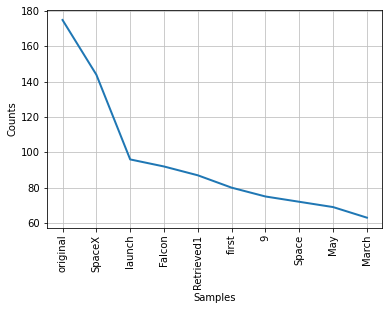

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
#importing the required libraries

import urllib.request as request
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Sending request to fetch data of weburl
response = request.urlopen('https://en.wikipedia.org/wiki/SpaceX')

# Reading the response
html = response.read()

# parsing the response to html
soup = BeautifulSoup(html,"html5lib")

# Fetching only the text 
text = soup.get_text(strip=True)

# tokenizing by word
tokens = [ t for t in text.split()]

# Cleaning the Data
# we have tokenized the data, but it contains general english words which are used for grammar to form structure sentence. 
# So, while analyzing the data we have to remove those. Those common words are fetched from "stopwords" package. 


### duplication of tokens data to clean_tokens variable.
clean_tokens = tokens[:]

### Remove the token if it is present in stopwords.
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
        

# Find the frequence of the words
freq = nltk.FreqDist(clean_tokens)


newDict_tokens = freq.copy()

# Deleting words which are repeated less than 5 times
for key,val in freq.items():
    if val < 5:
        newDict_tokens.pop(key)

# printing of the data

for key,val in newDict_tokens.items():
    print(str(key) + ":" + str(val))
    

    
# Data visualization using line graph
## showing top 10 repeated word 
newDict_tokens.plot(10,cumulative=False)



([<matplotlib.patches.Wedge at 0x2045406c580>,
 [Text(0.9219776404800613, 0.5999643576537018, 'original'),
  Text(-0.06342303348814808, 1.0981700773665075, 'SpaceX'),
  Text(-0.8255776656057376, 0.7269260746822754, 'launch'),
  Text(-1.094261190630691, 0.11221607139577985, 'Falcon'),
  Text(-0.9716581692552627, -0.5156359201214665, 'Retrieved1'),
  Text(-0.5583529318617588, -0.9477562996263218, 'first'),
  Text(-0.02356835798254339, -1.099747485790264, '9'),
  Text(0.49145752960827005, -0.9841084780608977, 'Space'),
  Text(0.8804471884832206, -0.6594033274802247, 'May'),
  Text(1.0763627936564035, -0.22681079434670345, 'March')])

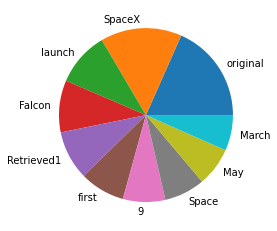

In [12]:
kiran = dict(newDict_tokens)
kumar = {}
sorted_keys = sorted(kiran, key=kiran.get,reverse=True)
count =0
for t in sorted_keys:
    kumar[t] = kiran[t]
    count+= 1
    if count == 10:
        break

t = kumar.keys()
values = kumar.values()
plt.pie(values,labels=t)